In [2]:
# Convergent Cross Mapping
import pyEDM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing

In [3]:
path = 'c:\\Users\\Tang\\OneDrive - University of Bristol\\MSc project\\Project\\Causal_Relationship_Inferring\\'

filename = 'data/output_populations_5-3000.csv'
filename2 = 'data/output_pops_E.csv'
st = 1000
ed = 2000

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

print(df.head(10))



iteration    1     2      3     4    5
1000       1001  992  1590  14827  8401  101
1001       1002  965  1532  14939  8364  101
1002       1003  947  1476  15088  8346   86
1003       1004  908  1434  15219  8310   87
1004       1005  871  1438  15342  8271   83
1005       1006  814  1371  15467  8251   94
1006       1007  756  1303  15588  8248   98
1007       1008  742  1276  15698  8230   87
1008       1009  671  1224  15807  8213   86
1009       1010  643  1205  15882  8226   83


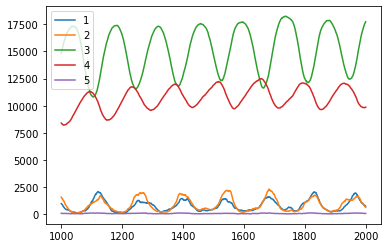

In [4]:
df[['1','2','3','4','5']].plot()

species_1  species_2  species_3  species_4
0   0.033494   0.046880   0.030716   0.024728
1   0.032582   0.045170   0.030948   0.024619
2   0.031974   0.043519   0.031257   0.024566
3   0.030658   0.042281   0.031528   0.024460
4   0.029408   0.042399   0.031783   0.024345
5   0.027484   0.040423   0.032042   0.024286
6   0.025525   0.038418   0.032293   0.024277
7   0.025053   0.037622   0.032520   0.024224
8   0.022656   0.036089   0.032746   0.024174
9   0.021710   0.035529   0.032902   0.024213


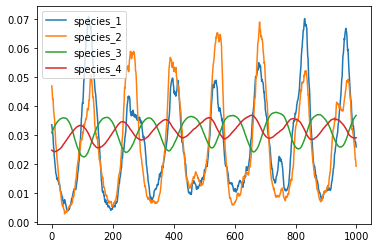

In [5]:
# Normalisation

norm_species_1 = preprocessing.normalize([np.array(df['1'])])
norm_species_2 = preprocessing.normalize([np.array(df['2'])])
norm_species_3 = preprocessing.normalize([np.array(df['3'])])
norm_species_4 = preprocessing.normalize([np.array(df['4'])])
norm_df = pd.DataFrame({'species_1': norm_species_1[0], 'species_2': norm_species_2[0], 'species_3': norm_species_3[0], 'species_4': norm_species_4[0]}, columns=['species_1', 'species_2', 'species_3', 'species_4'])
print(norm_df.head(10))
norm_df[['species_1','species_2','species_3','species_4']].plot()

species_1  species_2  species_3  species_4
0   0.399318   1.174307  -0.136930  -2.277448
1   0.345137   1.076486  -0.084049  -2.314163
2   0.309017   0.982038  -0.013699  -2.332024
3   0.230755   0.911202   0.048153  -2.367745
4   0.156507   0.917948   0.106227  -2.406444
5   0.042125   0.804948   0.165246  -2.426290
6  -0.074264   0.690261   0.222376  -2.429267
7  -0.102358   0.644724   0.274312  -2.447128
8  -0.244834   0.557022   0.325777  -2.463996
9  -0.301022   0.524977   0.361188  -2.451097


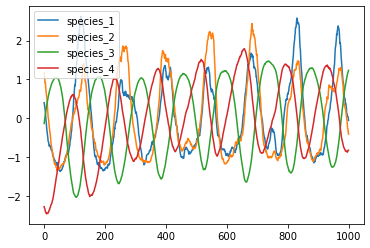

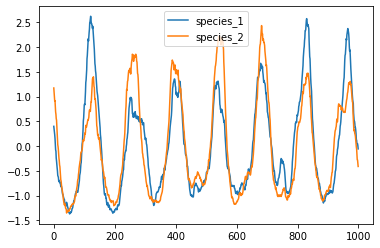

In [6]:
# Standardisation

data_df = pd.DataFrame({'species_1': df['1'], 'species_2': df['2'], 'species_3': df['3'], 'species_4': df['4']})
col_names = data_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_df, columns=col_names)

print(scaled_df.head(10))
scaled_df[['species_1','species_2','species_3','species_4']].plot()
scaled_df[['species_1','species_2']].plot()
#scaled_df[['1','4']].plot()

CCM Request Received


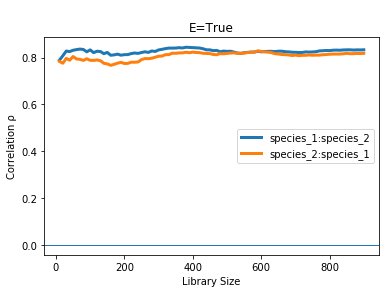

,LibSize,species_1:species_2,species_2:species_1
0,10.0,0.789076,0.783670
1,20.0,0.807903,0.775970
2,30.0,0.827973,0.796705
3,40.0,0.825685,0.788755
4,50.0,0.831442,0.804731
...,...,...,...
85,860.0,0.833270,0.816474
86,870.0,0.832318,0.816949
87,880.0,0.833041,0.817854
88,890.0,0.832768,0.817326


In [7]:
# Embeding Dimension

# total_rows = ed-st
# lib_str = str(0) + ' ' + str(int(total_rows*0.5)) 
# pred_str = str(int(total_rows*0.5)+1) + ' ' + str(total_rows)
# print(lib_str)
# print(pred_str)
# filtered_df = scaled_df.filter(items=[i for i in range(1000) if i%10==0], axis=0)
# filtered_df.reset_index(inplace=True)
# print(filtered_df.head(10))

scaled_df.reset_index(inplace=True)

#pyEDM.EmbedDimension(dataFrame=scaled_df, lib="0 500", pred="600 800", columns="1" )
#pyEDM.EmbedDimension(dataFrame=scaled_df, lib=lib_str, pred=pred_str, columns="2" )
pyEDM.CCM(dataFrame=scaled_df, E=True, columns="species_1", target="species_2", libSizes="10 900 10", showPlot=True, sample=100, verbose=True)

CCM Request Received


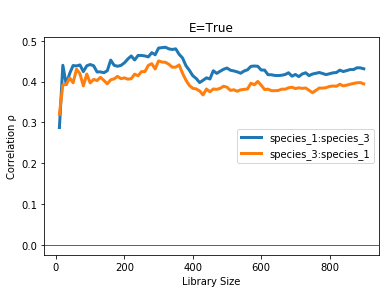

,LibSize,species_1:species_3,species_3:species_1
0,10.0,0.287455,0.319905
1,20.0,0.440122,0.392343
2,30.0,0.393094,0.392847
3,40.0,0.420039,0.408997
4,50.0,0.439461,0.397157
...,...,...,...
85,860.0,0.429609,0.393640
86,870.0,0.429720,0.395543
87,880.0,0.433989,0.397288
88,890.0,0.433733,0.397671


In [8]:
pyEDM.CCM(dataFrame=scaled_df, E=True, columns="species_1", target="species_3", libSizes="10 900 10", showPlot=True, sample=100, verbose=True)

CCM Request Received


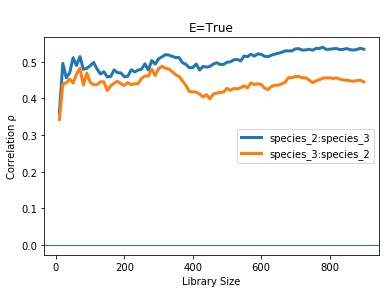

,LibSize,species_2:species_3,species_3:species_2
0,10.0,0.360626,0.342348
1,20.0,0.495668,0.439647
2,30.0,0.456268,0.442234
3,40.0,0.469797,0.452908
4,50.0,0.511179,0.441963
...,...,...,...
85,860.0,0.533010,0.448128
86,870.0,0.532192,0.447103
87,880.0,0.533571,0.448852
88,890.0,0.536929,0.449757


In [9]:
pyEDM.CCM(dataFrame=scaled_df, E=True, columns="species_2", target="species_3", libSizes="10 900 10", showPlot=True, sample=100, verbose=True)